In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

fname = '..\\flats.csv'

In [2]:
ds = pd.read_csv(fname, sep = ';', encoding = 'latin1')

#Excluding outliers, start date is 2017-07-24, and end date is 2017-12-14.

ds = ds[(ds['DateFrom']!=min(ds.DateFrom))&(ds['DateFrom']!=max(ds.DateFrom))]
X = ds[['Id','DateFrom']].groupby(['DateFrom'], as_index = False).count()

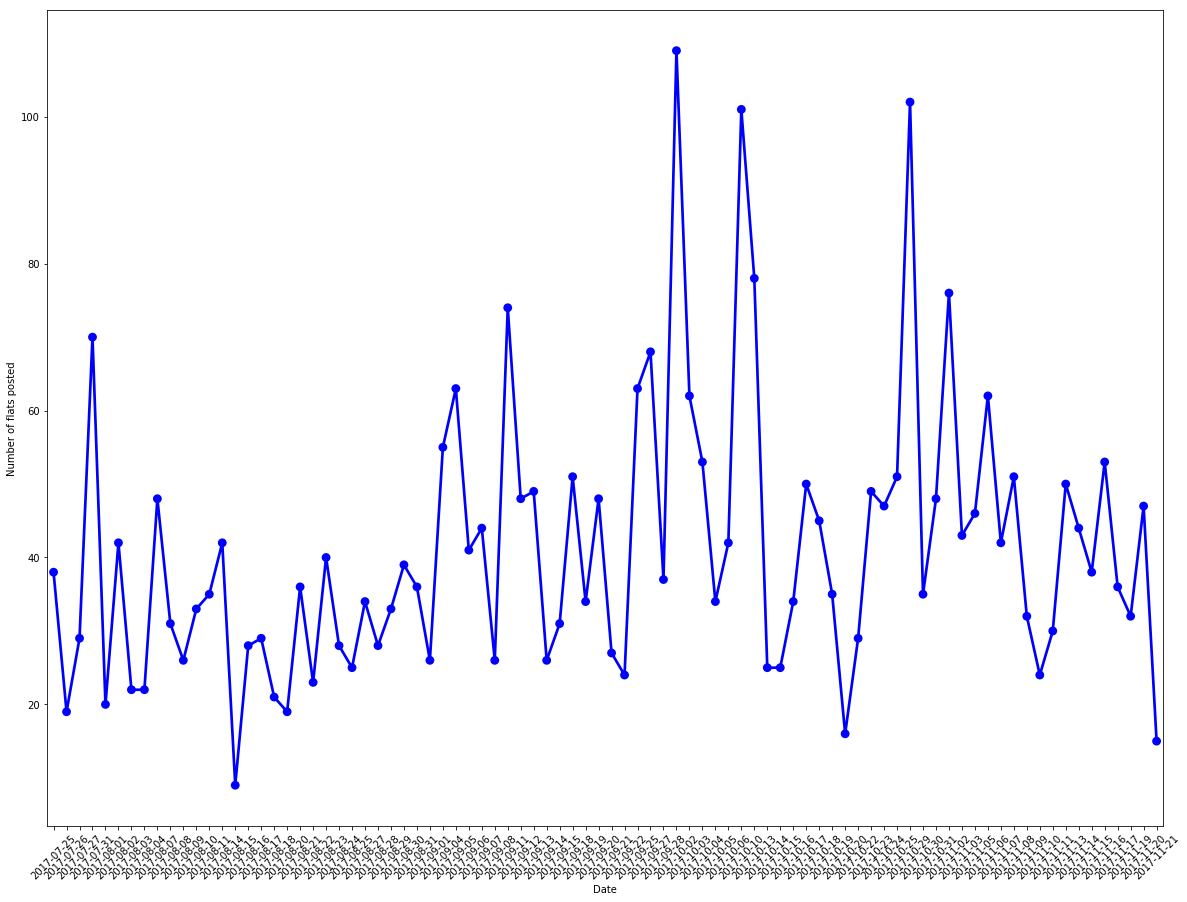

In [3]:
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(111)
sns.pointplot(x = 'DateFrom', y = 'Id' ,data = X, ax = ax1, color = 'blue', join = True)
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Number of flats posted")
plt.show()

Goverment changes has been announced in July and announced in early August (https://majorcadailybulletin.com/news/local/2017/08/10/48821/owners-start-cancel-apartment-rental-bookings.html)

Graph above shows that number of flats started to increase since middle of August. To check it, implementing moving average

C:\Users\maksim.lebedev\AppData\Local\Continuum\anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,min_periods=1,center=False).mean()
  """Entry point for launching an IPython kernel.


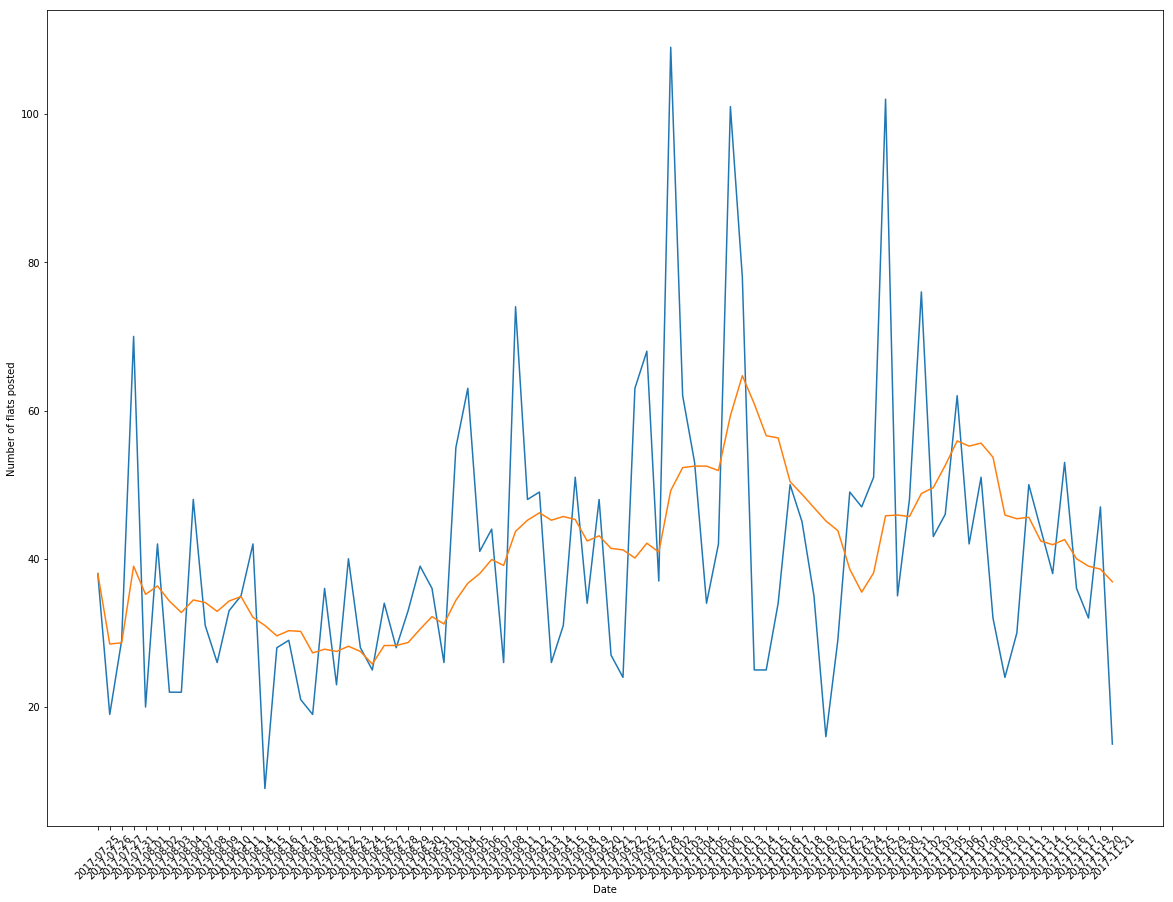

In [4]:
ma = pd.rolling_mean(arg = X, window=10, min_periods = 1)
fig2 = plt.figure(figsize=(20, 15))
ax2 = fig2.add_subplot(111)
plt.plot(X['DateFrom'], X['Id'], ma['DateFrom'], ma['Id'])
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Number of flats posted")
plt.show()

Moving average graph shows that, indeed, number of flats advertised started to increase. However it could be related with seasonality.

** Coming to prices **

In [5]:
pr = pd.read_csv( fname, sep = ';', encoding = 'latin1')
pr['Bedrooms'] = pr.Bedrooms.str.extract('(\d)').astype(int)
print(pr[['DateFrom', 'Bedrooms', 'Price']].groupby(['DateFrom','Bedrooms'], as_index = False).mean())

       DateFrom  Bedrooms         Price
0    2017-07-24         0    683.012048
1    2017-07-24         1    866.506849
2    2017-07-24         2    941.657303
3    2017-07-24         3    934.849057
4    2017-07-24         4   1130.974576
5    2017-07-24         5    921.666667
6    2017-07-24         6    983.125000
7    2017-07-24         9    750.000000
8    2017-07-25         0    720.000000
9    2017-07-25         1    629.166667
10   2017-07-25         2    847.500000
11   2017-07-25         3    817.105263
12   2017-07-25         4    730.000000
13   2017-07-25         5    850.000000
14   2017-07-26         0    600.000000
15   2017-07-26         1    675.000000
16   2017-07-26         2    871.250000
17   2017-07-26         3    834.000000
18   2017-07-26         4    900.000000
19   2017-07-26         5    800.000000
20   2017-07-27         0    725.000000
21   2017-07-27         1    700.000000
22   2017-07-27         2    852.142857
23   2017-07-27         3    953.333333


C:\Users\maksim.lebedev\AppData\Local\Continuum\anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


For analysis purposes I will exclude those flats with numbers of bedrooms bigger than 3. Will be calculating average price for every day, grouping it by bedroom number.

**Average price** is calculated taking into account only those flats, that has been added on that particular day. That's why prices for 2017-07-24 could be low due to number of flats available on the website (I started load at 27/07). I believe that this should give better view on "how" agencies or owners are setting prices.

C:\Users\maksim.lebedev\AppData\Local\Continuum\anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,min_periods=1,center=False).mean()
  after removing the cwd from sys.path.


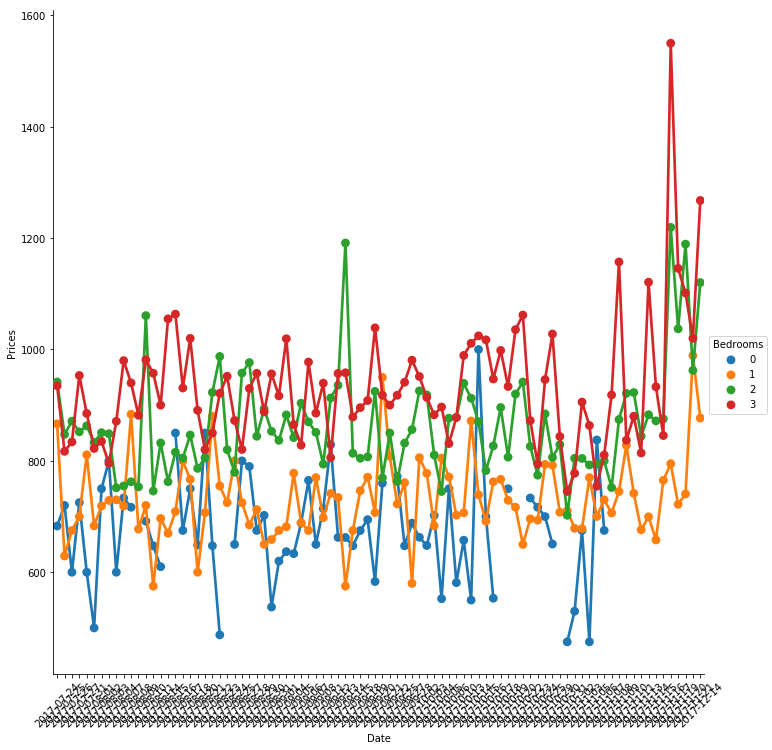

In [6]:
pr_max_3 = pr[pr['Bedrooms']<=3]
X_pr = pr_max_3.groupby(['DateFrom','Bedrooms'], as_index = False)['Price'].mean()
#X_pr0 = X_pr[X_pr['Bedrooms'] == 0]
ma0 = pd.rolling_mean(arg=X_pr, window=10, min_periods=1 )
sns.factorplot("DateFrom","Price", hue ="Bedrooms", data = X_pr, size = 10, legend = True)
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.show()

As result - we could see that there is no decreasing trend in pricing, meaning that owners and agencies didn't change their 'habbits' yet. However, as shown above - there are more flats available on the market.
As next steps:
1. Collect more data to check seasonality factor (it should be strong);
2. Evaluate 'time on the site' metric, which will allow to understand - how big is demand (many agencies aren't updating their pageson the website, this behaviour will make metric not accurate);
3. Add description field into extraction.
